In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os
import seaborn as sns

In [2]:
DatabaseDF = pd.read_csv("../CleanedDataset.csv")

In [3]:
DatabaseDF.head()

Unnamed: 0    Operator Well Name Formation  Lateral Length  Stages  \
0           0  Operator 1    Well 1       MBH          5114.0    30.0   
1           1  Operator 2    Well 2       MBH          5181.0     NaN   
2           2  Operator 2    Well 3       MBH          4780.0    15.0   
3           3  Operator 1    Well 4       MBH         10654.0     1.0   
4           4  Operator 2    Well 5       MBH          5209.0     1.0   

   Township   Range  Section  Total Prop, lbs  ...  Fluid Type from DI  \
0        141     99       10              0.0  ...                 NaN   
1        142     99       16         418000.0  ...                 NaN   
2        142     99       24         568407.0  ...                 NaN   
3        142     99        1         845000.0  ...                 NaN   
4        142     99       35         297366.0  ...                 NaN   

  SPACING_CAPPED  12 month Cum Prod  Completion Type  Sleeves  P&P  \
0          660.0              33.55              NaN      NaN  NaN   
1          660.0              27.62              NaN      NaN  NaN   
2          660.0              11.19               OH      NaN  NaN   
3          660.0              27.85              NaN      NaN  NaN   
4          660.0              50.88               OH      NaN  NaN   

   Frac Ports Repeater Ports  CT  Year Drilled  
0         NaN            NaN NaN        2006.0  
1         NaN            NaN NaN        2005.0  
2         NaN            NaN NaN        2006.0  
3         NaN            NaN NaN        2007.0  
4         NaN            NaN NaN        2006.0  

[5 rows x 30 columns]

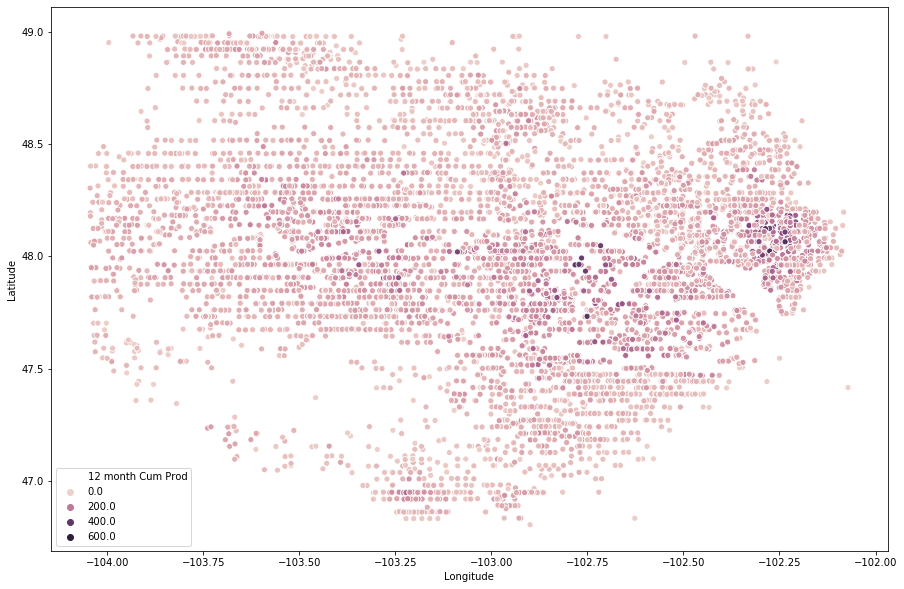

In [4]:
plt.subplots(figsize = (15,10)) # Scatter plot that takes longitude and latitude with relation to cumulative prod
sns.scatterplot(x = 'Longitude', y = 'Latitude', hue = '12 month Cum Prod',data = DatabaseDF)

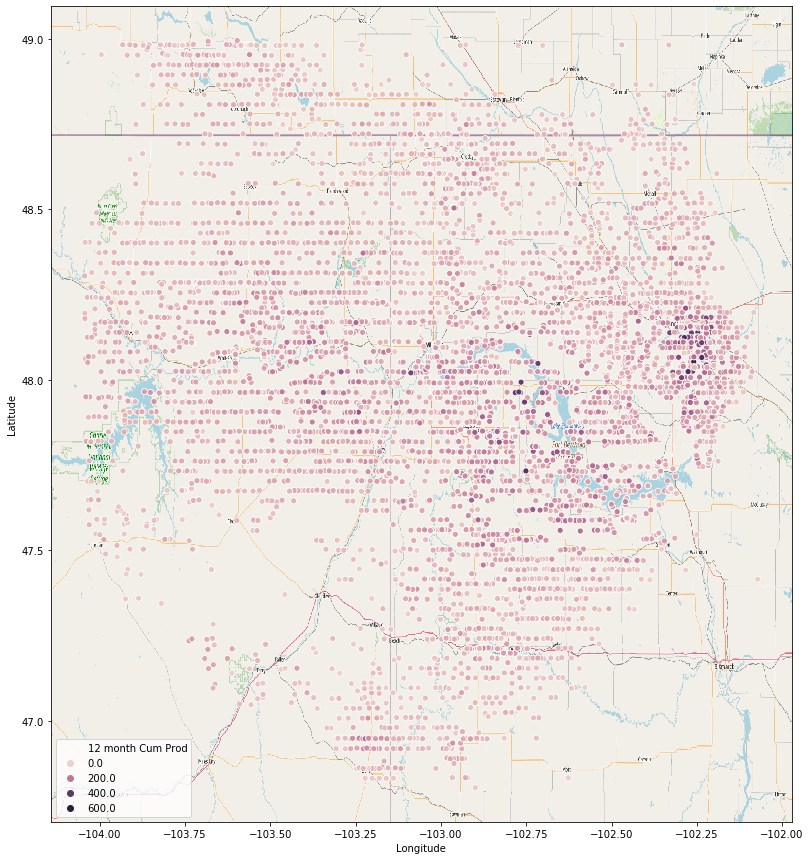

In [5]:
# add map beneath the scatterplot to oversee the region, creation of Dot Map

padding = .1

BBox = ((DatabaseDF.Longitude.min() - padding,   DatabaseDF.Longitude.max() + padding,      
         DatabaseDF.Latitude.min() - padding, DatabaseDF.Latitude.max() + padding))

areaMap = plt.imread("RegionMap.png")

fig, bx = plt.subplots(figsize = (15,10))

fig.set_size_inches(15,15)

bx = sns.scatterplot(x = DatabaseDF['Longitude'], y = DatabaseDF['Latitude'], hue = DatabaseDF['12 month Cum Prod'])
bx.set_xlim(BBox[0],BBox[1])
bx.set_ylim(BBox[2],BBox[3])

bx.imshow(areaMap, zorder = 0, extent = BBox, aspect = 'equal')

This is a Dot Map of the Wells based on Longitude and Latitude. The key shows the cumulative production over 12 months at these locations. We are able to pinpoint locations which have the most production in oil which is between Longitude of -102.5 - -102.25 and latitude of 48 - 48.5. As we can see, the overall most produced oil is in the East region of the map. 

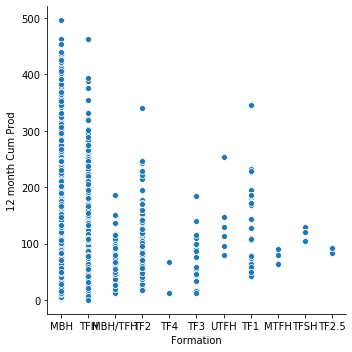

In [6]:
sns.relplot(x = "Formation", y = "12 month Cum Prod", data = DatabaseDF) # scatterplt for formation

MBH Formation has most production compared to other formations

In [1]:
## We should really get rid of this asap
!pip install geopandas

In [1]:
import geopandas as gpd           # importing geopandas

In [14]:
## Need to upload these files
os.chdir("/Users/sanyas/Desktop/NDGISHubData")

In [16]:
map_df = gpd.read_file("NDHUB.PLSSTOWNSHIPS_polygon.shp") # Load a shape file read by geopandas

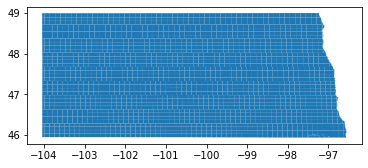

In [17]:
map_df.plot()

In [18]:
gdf = gpd.GeoDataFrame(DatabaseDF, geometry=gpd.points_from_xy(DatabaseDF.Longitude, DatabaseDF.Latitude))
# Take the data base and make a geopandas point with latitude and longitude

In [19]:
print(gdf.head())

   Unnamed: 0    Operator Well Name Formation  Lateral Length  Stages  \
0           0  Operator 1    Well 1       MBH          5114.0    30.0   
1           1  Operator 2    Well 2       MBH          5181.0     NaN   
2           2  Operator 2    Well 3       MBH          4780.0    15.0   
3           3  Operator 1    Well 4       MBH         10654.0     1.0   
4           4  Operator 2    Well 5       MBH          5209.0     1.0   

   Township   Range  Section  Total Prop, lbs  ...  SPACING_CAPPED  \
0        141     99       10              0.0  ...           660.0   
1        142     99       16         418000.0  ...           660.0   
2        142     99       24         568407.0  ...           660.0   
3        142     99        1         845000.0  ...           660.0   
4        142     99       35         297366.0  ...           660.0   

  12 month Cum Prod  Completion Type  Sleeves  P&P  Frac Ports  \
0             33.55              NaN      NaN  NaN         NaN   
1       

In [21]:
merged = gpd.sjoin(map_df, gdf, how="inner", op='intersects') # Merge new map of ND and the current database

/opt/anaconda3/envs/energyanalytics/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [22]:
merged.head()

OBJECTID  TOWNSHIP TDIR  RANGE RDIR  TWPRNG TWPTEXT RNGTEXT  TWPRNGTEXT  \
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   
5      1135       148    N     94    W  148094   T148N    R94W  T148N R94W   

   AREA_MI2  ...  Fluid Type from DI  SPACING_CAPPED  12 month Cum Prod  \
5  35.29072  ...                 NaN       589.66871              92.97   
5  35.29072  ...                 NaN       660.00000              51.41   
5  35.29072  ...                 NaN       660.00000              71.33   
5  35.29072  ...                 NaN       660.00000              37.93   
5  35.29072  ...                 NaN       660.00000              76.78   

  Completion Type  Sleeves   P&P Frac Ports Repeater Ports  CT  Year Drilled  
5         Sleeves     18.0   NaN        NaN            NaN NaN        2010.0  
5         Sleeves     10.0   NaN        NaN            NaN NaN        2008.0  
5           P & P      NaN   6.0        NaN            NaN NaN        2008.0  
5           P & P      NaN  12.0        NaN            NaN NaN        2009.0  
5         Sleeves     12.0   NaN        NaN            NaN NaN        2010.0  

[5 rows x 45 columns]

In [23]:
merged.describe()

OBJECTID      TOWNSHIP         RANGE         TWPRNG      AREA_MI2  \
count  10856.000000  10856.000000  10856.000000   10856.000000  10856.000000   
mean    1464.019713    152.173545     95.914794  152269.459377     35.764179   
std      317.042387      4.829445      3.479838    4829.407026      2.259759   
min      598.000000    139.000000     89.000000  139095.000000      7.255679   
25%     1259.000000    149.000000     93.000000  149101.000000     35.804911   
50%     1426.000000    152.000000     96.000000  152099.000000     35.914094   
75%     1746.000000    155.000000     99.000000  155095.000000     36.027256   
max     2062.000000    164.000000    105.000000  164102.000000     37.315742   

         AREA_ACRES    SHAPE_AREA     SHAPE_LEN   index_right    Unnamed: 0  \
count  10856.000000  10856.000000  10856.000000  10856.000000  10856.000000   
mean   22889.074390      0.011159      0.430692   5427.500000   5427.500000   
std     1446.245584      0.000709      0.013225   3134.001595   3134.001595   
min     4643.634440      0.002306      0.277770      0.000000      0.000000   
25%    22915.142848      0.011119      0.430029   2713.750000   2713.750000   
50%    22985.020242      0.011215      0.432164   5427.500000   5427.500000   
75%    23057.443544      0.011334      0.434129   8141.250000   8141.250000   
max    23882.074722      0.011528      0.437621  10855.000000  10855.000000   

       ...      Latitude     Longitude  SPACING_CAPPED  12 month Cum Prod  \
count  ...  10856.000000  10856.000000    10847.000000       10856.000000   
mean   ...     47.995412   -102.976506      596.784559          98.421863   
std    ...      0.420657      0.451102      110.862786          54.173541   
min    ...     46.804382   -104.044496       18.074815           0.280000   
25%    ...     47.759769   -103.324524      578.587387          60.917500   
50%    ...     47.993790   -102.928989      660.000000          88.970000   
75%    ...     48.238771   -102.617006      660.000000         124.847500   
max    ...     48.994837   -102.071631      660.000000         495.810000   

           Sleeves          P&P  Frac Ports  Repeater Ports         CT  \
count  4556.000000  5180.000000   17.000000        5.000000  15.000000   
mean     27.581870    28.950772   25.470588       20.000000  70.600000   
std       9.879565    10.537756   10.966527        9.027735  19.393666   
min       1.000000     1.000000    1.000000       15.000000  30.000000   
25%      22.000000    24.000000   19.000000       15.000000  55.500000   
50%      30.000000    30.000000   20.000000       16.000000  78.000000   
75%      34.000000    35.000000   37.000000       18.000000  85.000000   
max      80.000000    89.000000   37.000000       36.000000  94.000000   

       Year Drilled  
count  10848.000000  
mean    2012.425608  
std        2.208918  
min     2004.000000  
25%     2011.000000  
50%     2013.000000  
75%     2014.000000  
max     2017.000000  

[8 rows x 32 columns]

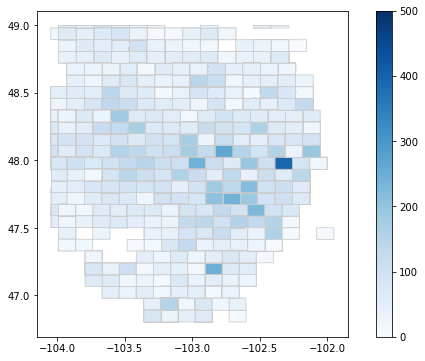

In [24]:
# set the value column that will be visualised
variable = '12 month Cum Prod'
# set the range for the choropleth values
vmin, vmax = 0, 500
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

fig, ax = plt.subplots(1, figsize=(10, 6))
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

Used PLSS Township as measure since Counties was too general to allow to see extent of oil production. It follows the similar idea of the 12 month cumulative production being focused on the east region of the map. PLSS is a public land survey township